In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Aqui estoy leyendo el archivo sin correccion para posteriormente poder hacer una comparacion
#Cargo el archivo de datos con el que trabajare
data = np.loadtxt('NGC6604_phot.dat',skiprows=2, usecols=(0,4,5))
#Creo un DataFrame
df=pd.DataFrame(data, columns=['Est-ID','B','V']) 
#Me deshago de los datos que no me sirven
df.drop(df[df['B'] ==99.999 ].index , inplace=True)
df.drop(df[df['V'] ==99.999 ].index , inplace=True)
#Creo una nueva columna con el color B-V
df['B-V']=df['B']-df['V']
#Reinicio el indice
df=df.reset_index(drop=True)

In [3]:
#Aqui leo el archivo con los datos corregidos
#Cargo el archivo de datos con el que trabajare
data2 = np.loadtxt('NGC6604_phot_corr.dat',skiprows=2, usecols=(0,4,5))
#Creo un DataFrame
df1=pd.DataFrame(data2, columns=['Est-ID','B_corr','V_corr']) 
#Me deshago de los datos que no me sirven
df1.drop(df1[df1['B_corr'] > 50 ].index , inplace=True)
df1.drop(df1[df1['V_corr'] > 50 ].index , inplace=True)
#Creo una nueva columna con el color B-V
df1['B-V_corr']=df1['B_corr']-df1['V_corr']
#Reinicio el indice
df1=df1.reset_index(drop=True)
df1

,Est-ID,B_corr,V_corr,B-V_corr
0,1404.0,6.474,6.132,0.342
1,315.0,5.936,6.251,-0.315
2,313.0,5.927,6.263,-0.336
3,743.0,6.385,6.687,-0.302
4,521.0,6.807,7.151,-0.344
...,...,...,...,...
350,722.0,16.274,16.150,0.124
351,198.0,16.656,16.159,0.497
352,172.0,16.744,16.187,0.557
353,1432.0,16.656,16.197,0.459


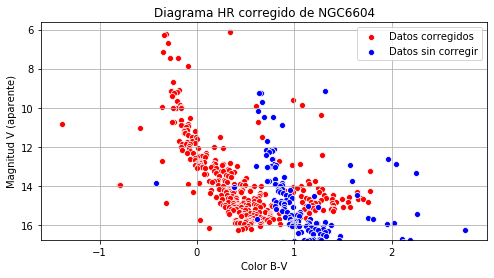

In [4]:
x0=df['B-V']
y0=df['V']
x=df1['B-V_corr']
y=df1['V_corr']
plt.figure(figsize=[8,4])
ax=sns.scatterplot(x,y, label='Datos corregidos',color='r')
ax=sns.scatterplot(x0,y0,label='Datos sin corregir',color='b')
plt.title('Diagrama HR corregido de NGC6604')
plt.ylim(max(y)+0.5, min(y)-0.5)
#plt.xlim(min(x), max(x))
plt.xlabel('Color B-V')
plt.ylabel('Magnitud V (aparente)')
plt.grid(True)

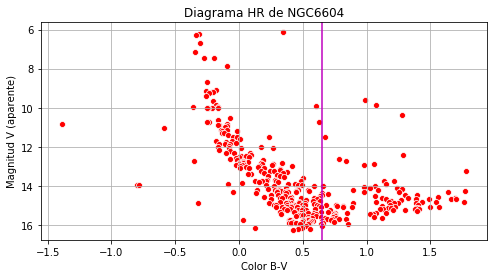

In [5]:
#Datos Del Sol: 
#Color B-V= 0.65
# Magnitud Absoluta MvS=4.8221

plt.figure(figsize=[8,4])
ax=sns.scatterplot(x,y,color='r')
plt.title('Diagrama HR de NGC6604')
plt.ylim(max(y)+0.5, min(y)-0.5)
plt.xlabel('Color B-V')
plt.ylabel('Magnitud V (aparente)')
plt.axvline(x=0.65,color='m')
plt.grid(True)

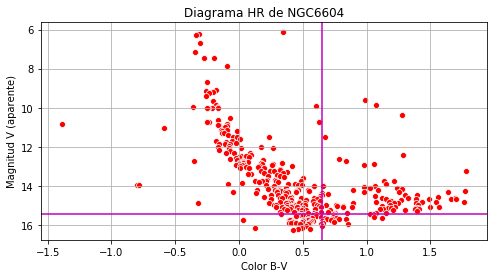

In [6]:
plt.figure(figsize=[8,4])
ax=sns.scatterplot(x,y,color='r')
plt.title('Diagrama HR de NGC6604')
plt.ylim(max(y)+0.5, min(y)-0.5)
plt.xlabel('Color B-V')
plt.ylabel('Magnitud V (aparente)')
plt.axvline(x=0.65,color='m')
plt.axhline(y=15.45,color='m')
plt.grid(True)

In [9]:
#Usando el Modulo de distancia Mv-V=5log(D)-5, calculo la distancia D al cúmulo.
#Donde:
Mv=15.45
V=4.8221
D=10**((Mv-V+5)/5)
print('La distancia al cúmulo es (aproximadamente)',"{0:.4f}".format(D),'parsecs')
print('La distancia al cúmulo es (aproximadamente)',"{0:.4f}".format(D*3.262),'años luz')
print('')
print('Mientras que en la actividad anterior obtuve los datos anteriores:')
Mv0=15.75
V=4.8221
D0=10**((Mv0-V+5)/5)
print('La distancia al cúmulo es (aproximadamente)',"{0:.4f}".format(D0),'parsecs')
print('La distancia al cúmulo es (aproximadamente)',"{0:.4f}".format(D0*3.262),'años luz')

La distancia al cúmulo es (aproximadamente) 1335.3035 parsecs
La distancia al cúmulo es (aproximadamente) 4355.7601 años luz

Mientras que en la actividad anterior obtuve los datos anteriores:
La distancia al cúmulo es (aproximadamente) 1533.1336 parsecs
La distancia al cúmulo es (aproximadamente) 5001.0818 años luz


In [8]:
#Para obtener el diagrama HR de Teff vs. L/ls

#Uso L=10^(-0.4(V-5logD+5-Mv))
df1['L_corr']=10**((-0.4)*((df1['V_corr'])-5*np.log10(D)+5-V))
#Teff 
#Para la Temperatura efectiva, hago uso de la aproximacion vista en clase
#En que se obtuvo que Teff=4350.5578*BV**(-0.4897).
#En un rango de color B-V: [0.4160 A 2.7509]
df1['Teff_corr']=4350.5578*df1['B-V_corr']**(-0.4897)
df1

,Est-ID,B_corr,V_corr,B-V_corr,L_corr,Teff_corr
0,1404.0,6.474,6.132,0.342,5335.805618,7357.535374
1,315.0,5.936,6.251,-0.315,4781.894607,NaN
2,313.0,5.927,6.263,-0.336,4729.334149,NaN
3,743.0,6.385,6.687,-0.302,3200.368595,NaN
4,521.0,6.807,7.151,-0.344,2087.372704,NaN
...,...,...,...,...,...,...
350,722.0,16.274,16.150,0.124,0.524807,12091.950027
351,198.0,16.656,16.159,0.497,0.520475,6126.877813
352,172.0,16.744,16.187,0.557,0.507224,5794.282346
353,1432.0,16.656,16.197,0.459,0.502574,6370.232315


In [17]:
#Para obtener el diagrama HR de Teff vs. L/ls

#Uso L=10^(-0.4(V-5logD+5-Mv))
df['L']=10**((-0.4)*((df['V'])-5*np.log10(D0)+5-V))
#Teff 
#Para la Temperatura efectiva, hago uso de la aproximacion vista en clase
#En que se obtuvo que Teff=4350.5578*BV**(-0.4897).
#En un rango de color B-V: [0.4160 A 2.7509]
df['Teff']=4350.5578*df['B-V']**(-0.4897)

,Est-ID,B,V,B-V,L,Teff
0,1404.0,10.451,9.139,1.312,440.960816,3808.840127
1,315.0,9.913,9.258,0.655,395.184589,5352.190691
2,313.0,9.904,9.270,0.634,390.840896,5438.283369
3,743.0,10.362,9.694,0.668,264.484363,5300.928046
4,521.0,10.784,10.158,0.626,172.504330,5472.206680
...,...,...,...,...,...,...
350,722.0,20.251,19.157,1.094,0.043371,4163.304351
351,198.0,20.633,19.166,1.467,0.043013,3606.152729
352,172.0,20.721,19.194,1.527,0.041918,3536.054634
353,1432.0,20.633,19.204,1.429,0.041534,3652.798035


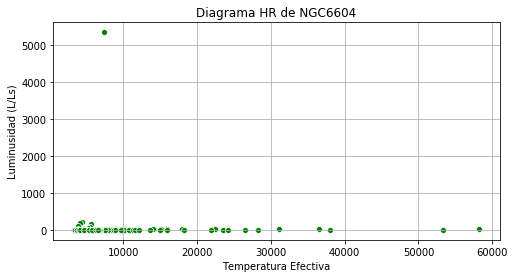

In [10]:
plt.figure(figsize=[8,4])
ax=sns.scatterplot(df1['Teff_corr'],df1['L_corr'],color='g')
plt.title('Diagrama HR de NGC6604')
plt.xlabel('Temperatura Efectiva')
plt.ylabel('Luminusidad (L/Ls)')
plt.grid(True)

In [18]:
#Para localizar la estrella más luminosa
i=df1['L_corr'].max()
#Su temperatura 
Tmax=df1['Teff_corr'][df1.index[df1['L_corr']==i][0]]

#Para obtener el radio uso:
# L=4*pi*R^2*SB*Teff
#Donde SB= 5.67*10^-8 es la constante de Stefan-Boltzmann
SB=5.67e-8
Rmax=np.sqrt(i/(4*np.pi*SB*Tmax**4))

print('La estrella mas luminosa del cumulo tiene:')
print('Una luminusidad',round(i,4),'veces la luminusidad del Sol')
print('Una temperatura efectiva de',round(Tmax,4),'Kelvins')
print('Un radio de',round(Rmax,8),'veces el radio del sol')

#Comparando con los datos anteriores
i0=df['L'].max()
Tmax0=df['Teff'][df.index[df['L']==i0][0]]

Rmax0=np.sqrt(i0/(4*np.pi*SB*Tmax0**4))
print('')
print('En comparacion con la tarea anterior, obtuve:')
print('')
print('Una luminusidad',round(i0,4),'veces la luminusidad del Sol')
print('Una temperatura efectiva de',round(Tmax0,4),'Kelvins')
print('Un radio de',round(Rmax0,8),'veces el radio del sol')

La estrella mas luminosa del cumulo tiene:
Una luminusidad 5335.8056 veces la luminusidad del Sol
Una temperatura efectiva de 7357.5354 Kelvins
Un radio de 0.0015986 veces el radio del sol

En comparacion con la tarea anterior, obtuve:

Una luminusidad 440.9608 veces la luminusidad del Sol
Una temperatura efectiva de 3808.8401 Kelvins
Un radio de 0.00171482 veces el radio del sol


In [20]:
#Para localizar la estrella menos luminosa
j=df1['L_corr'].min()
#Su temperatura
Tmin=df1['Teff_corr'][df1.index[df1['L_corr']==j][0]]
#Su radio 
Rmin=np.sqrt(j/(4*np.pi*SB*Tmin**4))

print('La estrella menos luminosa del cumulo tiene:')
print('Una luminusidad',round(j,4),'veces la luminusidad del Sol')
print('Una temperatura efectiva de',round(Tmin,4),'Kelvins')
print('Un radio de',round(Rmin,8),'veces el radio del sol')

#Comparando con los datos anteriores
j0=df['L'].min()
Tmin0=df['Teff'][df.index[df['L']==j0][0]]

Rmin0=np.sqrt(j0/(4*np.pi*SB*Tmin0**4))
print('')
print('En comparacion con la tarea anterior, obtuve:')
print('')
print('Una luminusidad',round(j0,4),'veces la luminusidad del Sol')
print('Una temperatura efectiva de',round(Tmin0,4),'Kelvins')
print('Un radio de',round(Rmin0,8),'veces el radio del sol')

La estrella menos luminosa del cumulo tiene:
Una luminusidad 0.4742 veces la luminusidad del Sol
Una temperatura efectiva de 6645.597 Kelvins
Un radio de 1.847e-05 veces el radio del sol

En comparacion con la tarea anterior, obtuve:

Una luminusidad 0.0392 veces la luminusidad del Sol
Una temperatura efectiva de 3701.3286 Kelvins
Un radio de 1.712e-05 veces el radio del sol


**Como se ve en los datos anteriores, al tener la correccion vemos que la luminosidad y la temperatura de las estrellas es mayor a cuando usamos los datos sin correccion. Mientras que el radio disminuyo en tamaño.**